In [3]:
import os
import cv2
import time
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import shutil
import os


dataset_path = r"/content/drive/MyDrive/Mask_detection_Dataset/dataset"
# Define the categories
categories = ['without_mask',
              'with_mask']

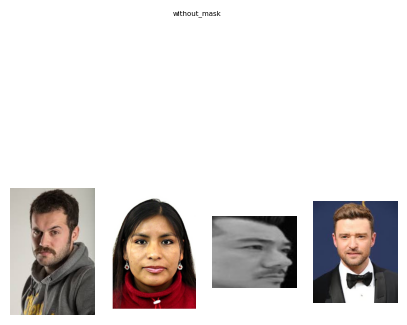

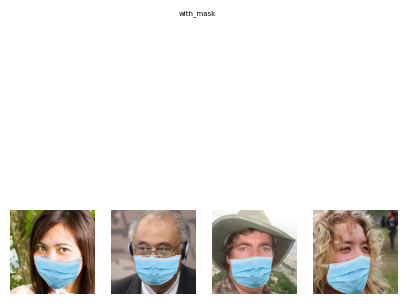

In [4]:
# Function to plot images
def plot_images(image_dir, category, num_images=4):
    fig, axes = plt.subplots(1, num_images, figsize=(5, 5))
    fig.suptitle(category, fontsize=5)

    for i, file_name in enumerate(os.listdir(image_dir)[:num_images]):
        img_path = os.path.join(image_dir, file_name)
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

# Plot a few images from each category
for category in categories:
    image_dir = os.path.join(dataset_path, category)
    plot_images(image_dir, category)

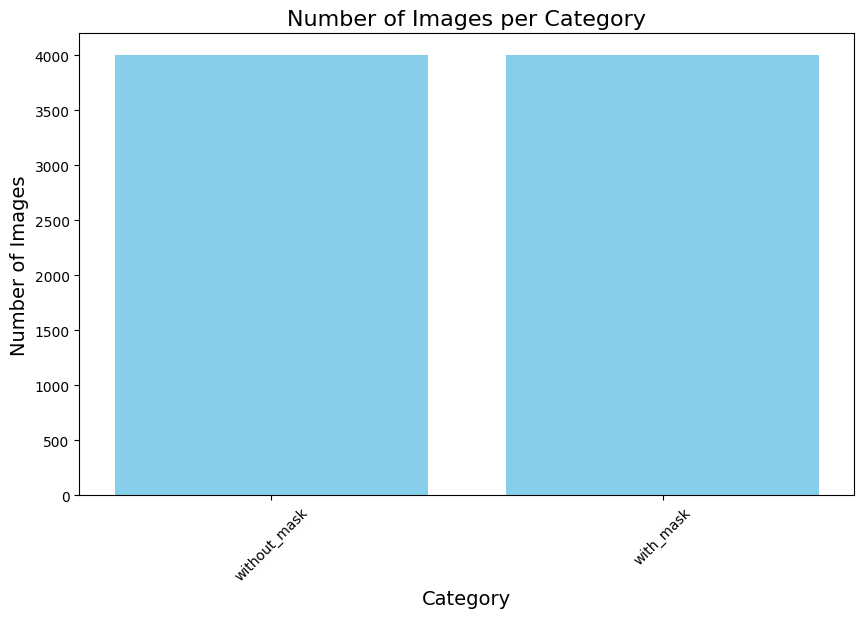

In [5]:
# Function to count images in each category and plot a bar graph
def plot_category_counts(dataset_path, categories):
    # Lists to store category names and image counts
    category_names = []
    image_counts = []

    # Iterate over each category to count the images
    for category in categories:
        image_dir = os.path.join(dataset_path, category)
        num_images = len(os.listdir(image_dir))

        category_names.append(category)
        image_counts.append(num_images)

    # Plotting the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(category_names, image_counts, color='skyblue')
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title('Number of Images per Category', fontsize=16)
    plt.xticks(rotation=45)  # Rotate category names for better readability
    plt.show()

# Now, call the function with your dataset path and categories
plot_category_counts(dataset_path, categories)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(320, 320),
    batch_size=32,
    class_mode='binary',  # Adjusted for binary classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(320, 320),
    batch_size=32,
    class_mode='binary',  # Adjusted for binary classification
    subset='validation'
)


Found 6400 images belonging to 2 classes.
Found 1598 images belonging to 2 classes.


In [7]:
# Accessing class_indices attribute
class_indices = validation_generator.class_indices

# Getting class names from the class_indices dictionary
class_names = list(class_indices.keys())

# Printing class names
print("Class names in the training generator:")
for name in class_names:
    print(name)

Class names in the training generator:
with_mask
without_mask


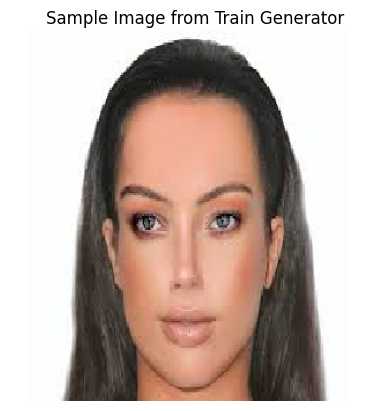

Label for this image: 1.0


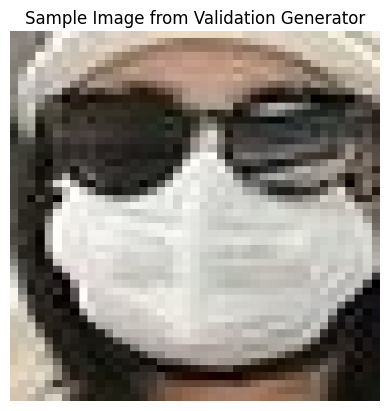

Label for this image: 0.0


In [8]:
# Get a batch of images and labels from the train_generator
images, labels = next(train_generator)

# Plot the first image in the batch
plt.imshow(images[0])
plt.title("Sample Image from Train Generator")
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# If you also want to display the label for this image
print("Label for this image:", labels[0])


# Get a batch of images and labels from the train_generator
images, labels = next(validation_generator)

# Plot the first image in the batch
plt.imshow(images[0])
plt.title("Sample Image from Validation Generator")
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# If you also want to display the label for this image
print("Label for this image:", labels[0])

In [9]:
# Define the CNN model for binary classification
model = Sequential([
    tensorflow.keras.Input(shape=(320, 320, 3)),  # Change to 3 for RGB or 1 for grayscale
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Use binary_crossentropy for a binary classification problem
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
train_generator.n

6400

In [11]:
#Configure early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Configure model checkpointing
model_checkpoint = ModelCheckpoint(
    r'/content/drive/MyDrive/MaskDetection/best_cnnbasic_model',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

history = model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]  # Add model_checkpoint here
)

# Save the final model
model.save(r'/content/drive/MyDrive/MaskDetection/cnnbasic_model_final')

Epoch 1/100
200/200 [==============================] - 1137s 5s/step - loss: 0.2374 - accuracy: 0.9506 - val_loss: 0.2198 - val_accuracy: 0.9133
Epoch 2/100
200/200 [==============================] - 86s 429ms/step - loss: 0.0726 - accuracy: 0.9787 - val_loss: 0.1064 - val_accuracy: 0.9700
Epoch 3/100
200/200 [==============================] - 75s 374ms/step - loss: 0.0579 - accuracy: 0.9798 - val_loss: 0.1547 - val_accuracy: 0.9579
Epoch 4/100
200/200 [==============================] - 72s 361ms/step - loss: 0.0662 - accuracy: 0.9808 - val_loss: 0.1434 - val_accuracy: 0.9585
Epoch 5/100
200/200 [==============================] - 72s 359ms/step - loss: 0.0396 - accuracy: 0.9884 - val_loss: 0.1267 - val_accuracy: 0.9656
Epoch 6/100
200/200 [==============================] - 82s 408ms/step - loss: 0.0371 - accuracy: 0.9881 - val_loss: 0.0786 - val_accuracy: 0.9745
Epoch 7/100
200/200 [==============================] - 84s 420ms/step - loss: 0.0330 - accuracy: 0.9886 - val_loss: 0.1687 - 